This type of file is called a notebook. They are commonly used in data science. 
These notebooks allow us to write code, execute code, and add webpage style text all in one spot.
Each 'block' is called a cell. Markdown cells are like this one, they have text. Code cells are like the one below, that's where our code goes.
The little play sign next to each code cell is how we run (execute) that bit of code. Any errors or results will print below that cell. 

In [2]:
#The pound sign means a comment, you can write free text here that will be ignored when you run some code. 
#Import some libraries - these packages have usefull stuff that we can use to make out lives easier....
#The 'as pd' thing just gives us a nickname, we'll use that pandas name often, and pd is easier to type
#Using pandas as pd isn't required, but is almost universally common. Same with numpy. 
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

We'll load some data in from a CSV flie to get started. The data will get loaded into something called a dataframe, which is a type of data structure - or programming thing that holds data. Functionally, it is basically like turning the data in that file into a spreadsheet in our program, we can then manipulate that spreadsheet to do what we want. Once the data is loaded, the head function lets us take a peek at the first 5 rows. 

#Look at the data - what's cetegorical, what is numerical?

In [3]:
#The 'pd' that we imported before gives us something called a dataframe
#The df as a name for the dataframe is a common standard, it can be anything
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#See what columns we have
#This is calling a value that exists inside our dataframe, so it is just "object.value".
#You'll learn more on this in the programming class.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can 'grab' a column by using the name (in a couple of ways), or the position (0,1,2,3...)

In [5]:
#This works, we'll usually avoid it because it is not quite as clear
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
#This also works, and is sometimes usefull if you're doing things like looping through data
#It is probably more confusing in most cases though, so we won't use it.
#Survived is the second column, and in programming we (almost) always start counting at 0. So we are getting column #1
df.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
#This is probably the most simple way, and this is what I'll try to use all the time
#Unless specified explicity, you can use whatever you want (in general, not just this)
#This will be the easiest to keep straight, I think
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
#Challenge - print multiple columns. Survived and Age!
#You may need to Google, think about what to Google and try to implement what you find


We can get some basic statistics on each column, to see what we have.

In [9]:
#This time we're calling a function that exists inside our dataframe, so it is "object.function()". Note the brackets.
# Same deal, learn this in the other class.
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vande Velde, Mr. Johannes Joseph",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In programming talk, null means nothing (not 0, or blank, literally nothing).
So, we are checking to see which columns have a bunch of missing values.

In [10]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Try to tally it up and count how many NULLs we have. 
#It is simple (one line) - try to Google and implement. 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#How many people lived? Look at the Survived column and tally it up.
#In programming 0/1 for true false is common. 0=false, 1=true. Virtually always. 
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#Value counts can also help us figure out if there is any junk.
df["Cabin"].value_counts().sort_values(ascending=False)

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
D30            1
F38            1
B41            1
B73            1
E68            1
Name: Cabin, Length: 147, dtype: int64

The cabin looks like it is just their room number. I think this is useless, why?

In [14]:
#We'll get rid of it.
df.drop(columns=["Cabin"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


I'm a shallow capitalist, how much did people pay?

In [15]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

More looking at who paid what. Is there a better way to do this? I threw in that "round" function to get rid of messy decimals

In [16]:
round(df["Fare"]).value_counts().sort_index()

0.0      15
4.0       1
5.0       1
6.0       5
7.0      65
         ..
228.0     4
248.0     2
262.0     2
263.0     4
512.0     3
Name: Fare, Length: 90, dtype: int64

I'm a really shallow capitalist, how much did people in different classes pay?
This will take a few boxes....
First, what classes are there? In order this time

In [17]:
df["Pclass"].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [18]:
#Make separate dataframes, one for each class of passenger
#Try one first, and check visually that we did it right. How do you check?
df_1 = df[df["Pclass"] == 1]
df_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [19]:
#Do the other two
df_2 = df[df["Pclass"]==2]
df_3 = df[df["Pclass"]==3]

In [20]:
#Take a look
#What happens?
df_1["Fare"].describe()
df_2["Fare"].describe()
df_3["Fare"].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

In [21]:
#I'm wrapping all these in print statements. This'll force them all to print. 
#This is kind of ugly, but it'll do the job here. 
print(df_1["Fare"].describe())
print(df_2["Fare"].describe())
print(df_3["Fare"].describe())

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


What kind of conclusions or insights can you draw here? Any changes to the data that might make this better? Is there any more insightfull way you could look at this same data?

In [22]:
#Note: for the stuff below, there's not necissarily one way to do things, especially as the data gets more complex.
#When we're exploring the data there's usually several ways to look for the insights, sometimes some are better than others.
#What makes the most sense depends on the data, you'll get better at deciding with experience.

#Back to humanitarianism, how much better off were high class passengers to survive?
#Try it out.....

In [23]:
#What was the mean fare of survivors vs dead DiCaprios?

In [24]:
#Women and children first! We need to make sure they survive!!!!! Does that hold up? Try to examine it.

------------------------------------------------------------------------------------------------------------

In [25]:
#If you're super fast, you can start looking at this stuff below.
#We'll cover this next week in detail, so if you don't get it, no big deal. 

#We can draw pretty pictures!
#Look up a Python dictionary and make sense of the output below.
hist = thinkstats2.Hist(np.floor(df["Fare"]), label='Fare')
hist

Hist({7.0: 213, 8.0: 70, 26.0: 57, 13.0: 50, 10.0: 28, 15.0: 27, 9.0: 25, 14.0: 21, 27.0: 17, 0.0: 15, 30.0: 15, 31.0: 14, 12.0: 13, 39.0: 13, 16.0: 12, 21.0: 11, 6.0: 11, 24.0: 10, 29.0: 10, 52.0: 10, 11.0: 9, 56.0: 9, 20.0: 9, 69.0: 9, 25.0: 8, 19.0: 8, 18.0: 8, 23.0: 8, 79.0: 7, 34.0: 6, 46.0: 6, 53.0: 5, 73.0: 5, 83.0: 5, 77.0: 5, 35.0: 5, 55.0: 5, 78.0: 4, 33.0: 4, 227.0: 4, 90.0: 4, 76.0: 4, 263.0: 4, 151.0: 4, 22.0: 4, 57.0: 4, 120.0: 4, 211.0: 4, 110.0: 4, 51.0: 3, 135.0: 3, 113.0: 3, 86.0: 3, 61.0: 3, 512.0: 3, 41.0: 3, 153.0: 3, 49.0: 3, 71.0: 3, 17.0: 3, 36.0: 2, 93.0: 2, 106.0: 2, 133.0: 2, 82.0: 2, 247.0: 2, 32.0: 2, 37.0: 2, 91.0: 2, 28.0: 2, 146.0: 2, 108.0: 2, 50.0: 2, 164.0: 2, 134.0: 2, 89.0: 2, 262.0: 2, 65.0: 2, 66.0: 2, 80.0: 2, 40.0: 1, 4.0: 1, 221.0: 1, 81.0: 1, 59.0: 1, 47.0: 1, 75.0: 1, 42.0: 1, 38.0: 1, 5.0: 1, 63.0: 1}, 'Fare')

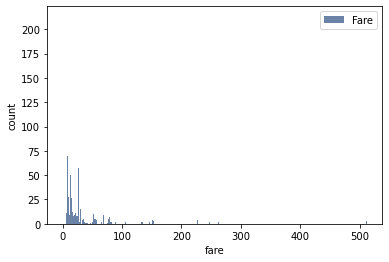

In [26]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='fare', ylabel='count')